In [6]:
import os

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import HTML, display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

## Predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.



In [7]:
def train_data():
    
    filename = 'train.csv'
    
    if os.path.isfile(filename):
        
        print('Found Data')
        
        return pd.read_csv(filename)

In [10]:
def wrangle_data():
    
    df = train_data()
    
    df = df.rename(columns = {'LoanID': 'loan_id', 'LoanAmount': 'loan_amount', 'CreditScore': 'credit_score', 'MonthsEmployed': 'months_employed', 'NumCreditLines': 'num_credit_lines', 'InterestRate': 'interest_rate', 'LoanTerm': 'loan_term', 'DTIRatio': 'dti_ratio', 'EmploymentType': 'employment_type', 'MaritalStatus': 'marital_status', 'HasMortgage': 'mortgage', 'HasDependents': 'dependents', 'LoanPurpose': 'loan_purpose', 'HasCoSigner': 'cosigned'})
    
    df = df.drop(columns = ['loan_id'])
    
    df.columns = df.columns.str.lower()
    
    return df

In [11]:
df = wrangle_data()
df.head()

Found Data


age  income  loan_amount  credit_score  months_employed  num_credit_lines  \
0   56   85994        50587           520               80                 4   
1   69   50432       124440           458               15                 1   
2   46   84208       129188           451               26                 3   
3   32   31713        44799           743                0                 3   
4   60   20437         9139           633                8                 4   

   interest_rate  loan_term  dti_ratio    education employment_type  \
0          15.23         36       0.44   Bachelor's       Full-time   
1           4.81         60       0.68     Master's       Full-time   
2          21.17         24       0.31     Master's      Unemployed   
3           7.07         24       0.23  High School       Full-time   
4           6.51         48       0.73   Bachelor's      Unemployed   

  marital_status mortgage dependents loan_purpose cosigned  default  
0       Divorced      Yes        Yes        Other      Yes        0  
1        Married       No         No        Other      Yes        0  
2       Divorced      Yes        Yes         Auto       No        1  
3        Married       No         No     Business       No        0  
4       Divorced       No        Yes         Auto       No        0

In [12]:
def summarize(df):
    
    text = 'Shape:'
    bold_text = f'<b>{text}</b>'
    display(HTML(bold_text))
    print(df.shape)
    print('')
    print('_________________________________________________')
    print('')
    
    text = 'Info:'
    bold_text = f'<b>{text}</b>'
    display(HTML(bold_text))
    df.info()
    print('')
    print('_________________________________________________')
    print('')
    
    text = 'Null Values:'
    bold_text = f'<b>{text}</b>'
    display(HTML(bold_text))
    print('')
    print(df.isna().sum())
    print('')
    print('_________________________________________________')
    print('')
    
    for col in df.columns.values:
        text = f'Value Count for {col}:'
        bold_text = f'<b>{text}</b>'
        display(HTML(bold_text))

        print('')
        vc = df[col].value_counts()
        print(vc)
        print('')
        print('_________________________________________________')
        print('')

In [13]:
def plt_dist(df, feats, loop = False):
    
    if loop:
        
        for col in df.columns:

            plt.hist(df[col], bins = 50)

            plt.xlabel(f'{col.replace("_", " ").title()}')

            plt.ylabel('Count')

            plt.title(f'Distribution of {col.replace("_", " ").title()}')

            plt.show()
            
    else: 
        
        plt.hist(df[feats], bins = 50)

        plt.xlabel(f'{feats.replace("_", " ").title()}')

        plt.ylabel('Count')

        plt.title(f'Distribution of {feats.replace("_", " ").title()}')

        plt.show()

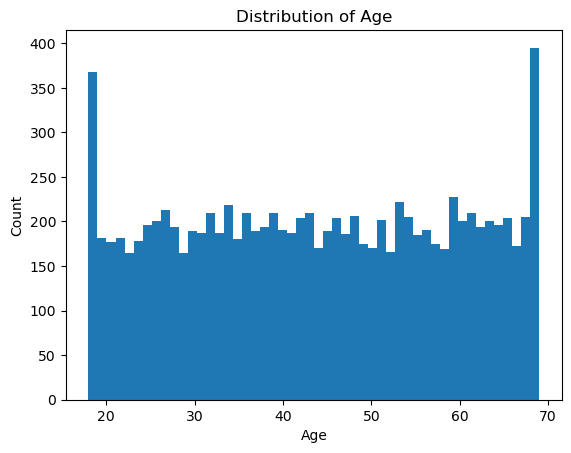

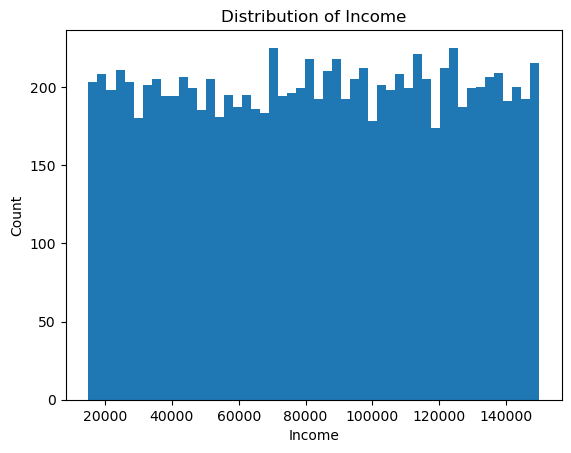

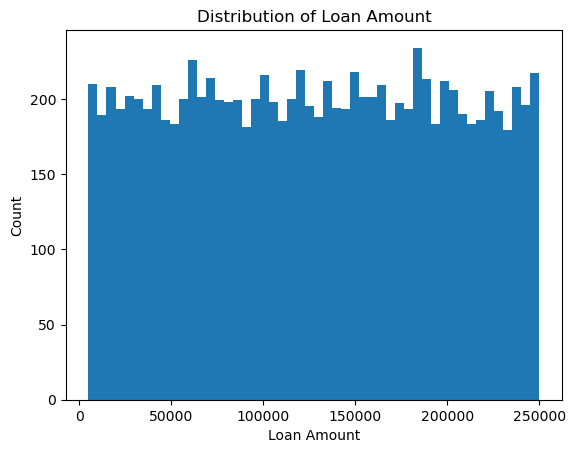

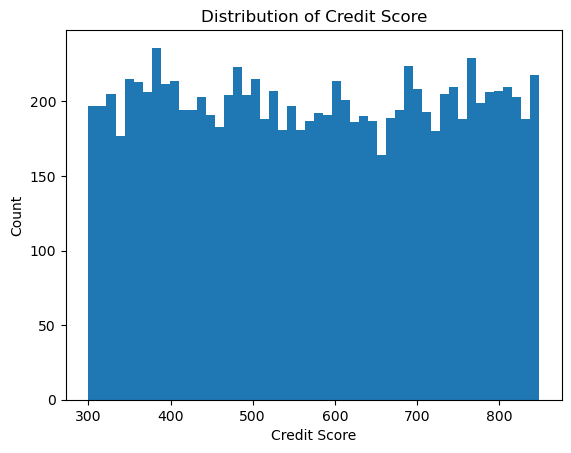

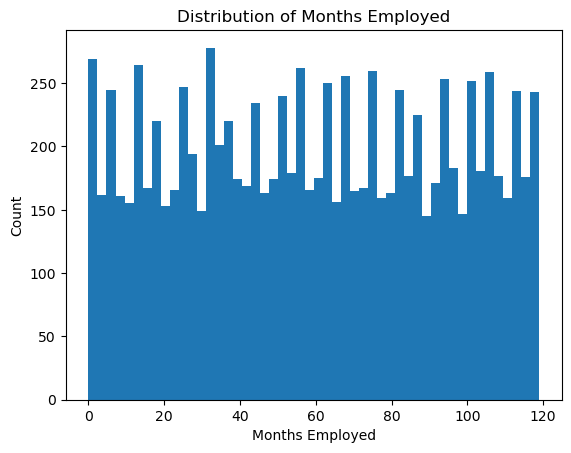

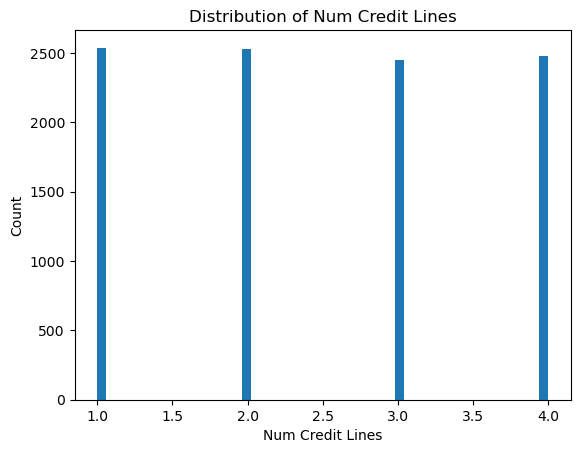

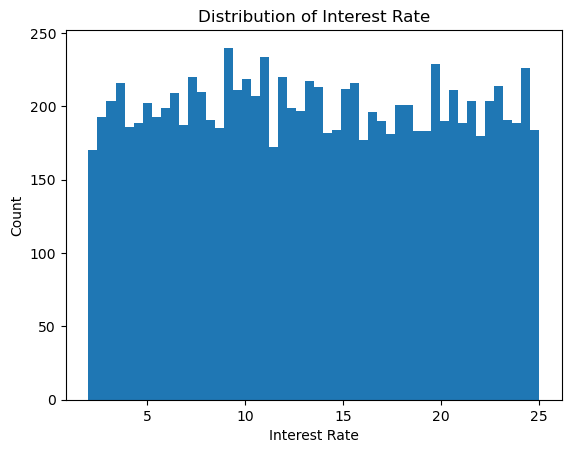

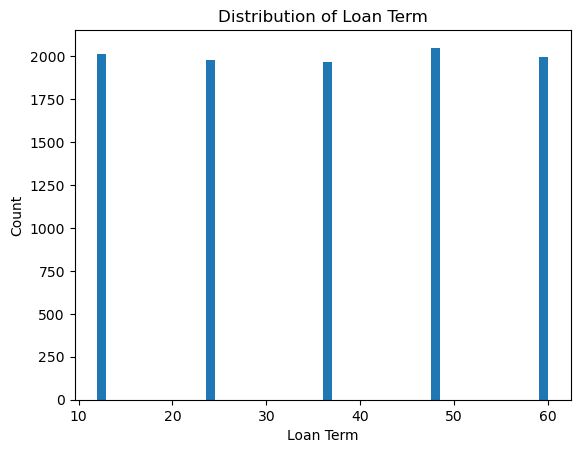

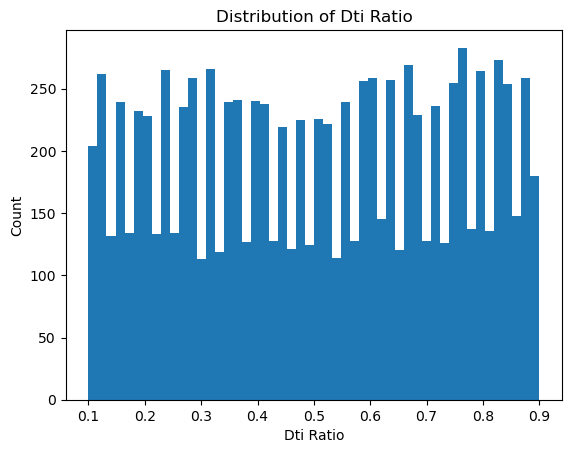

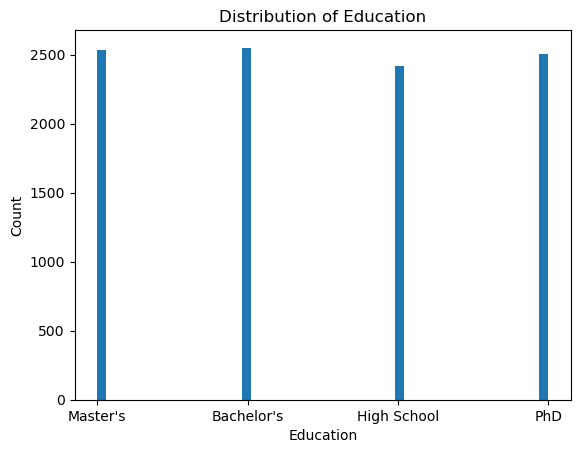

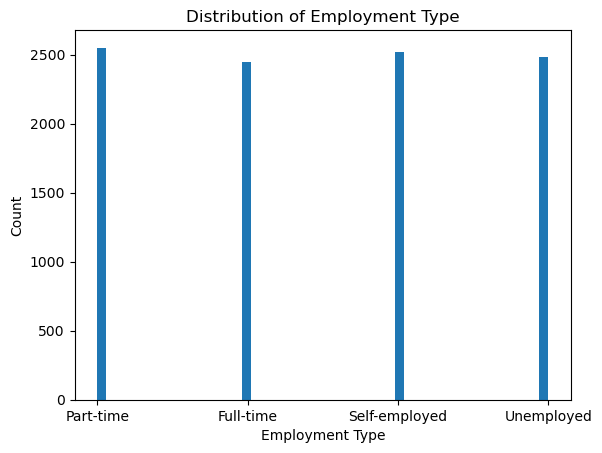

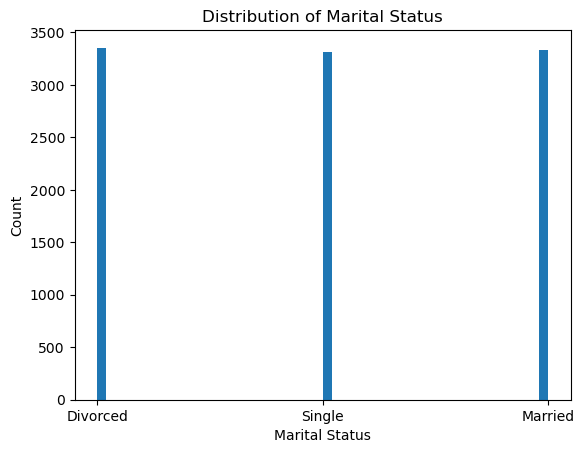

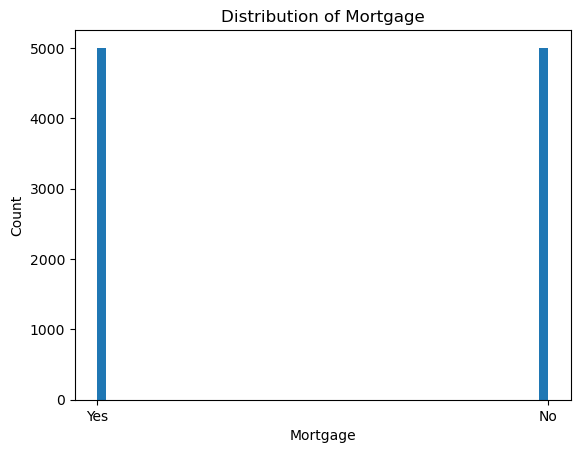

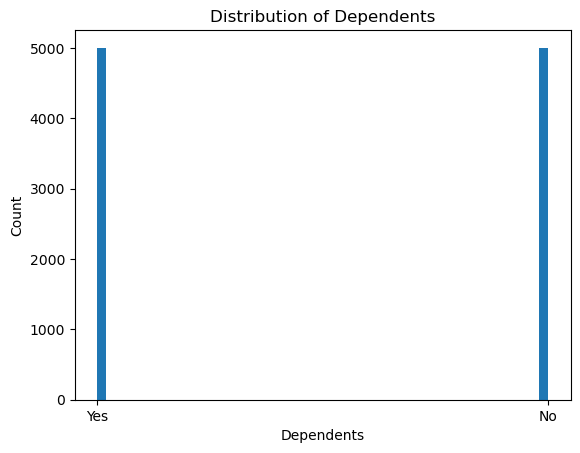

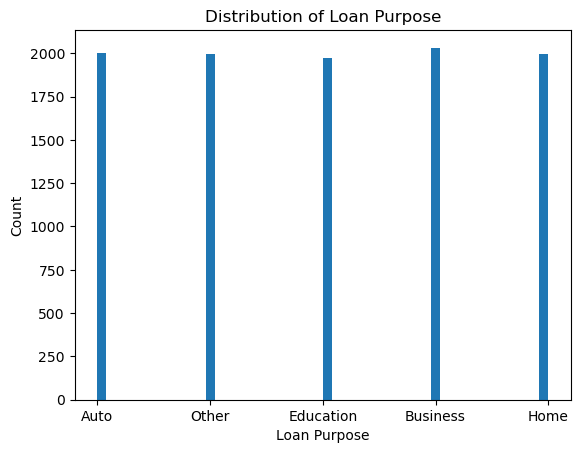

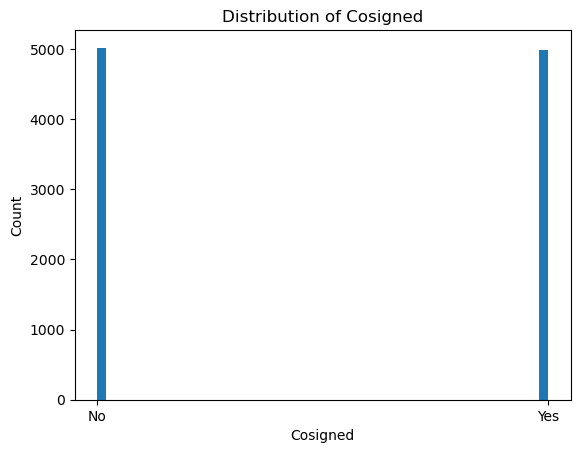

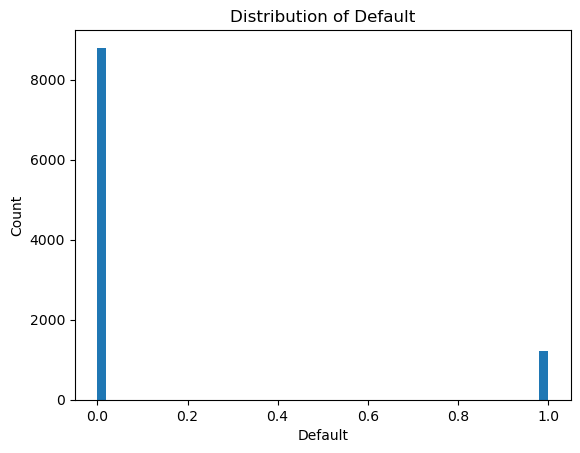

In [14]:
plt_dist(df.sample(10_000), 'loan_term', loop = True)

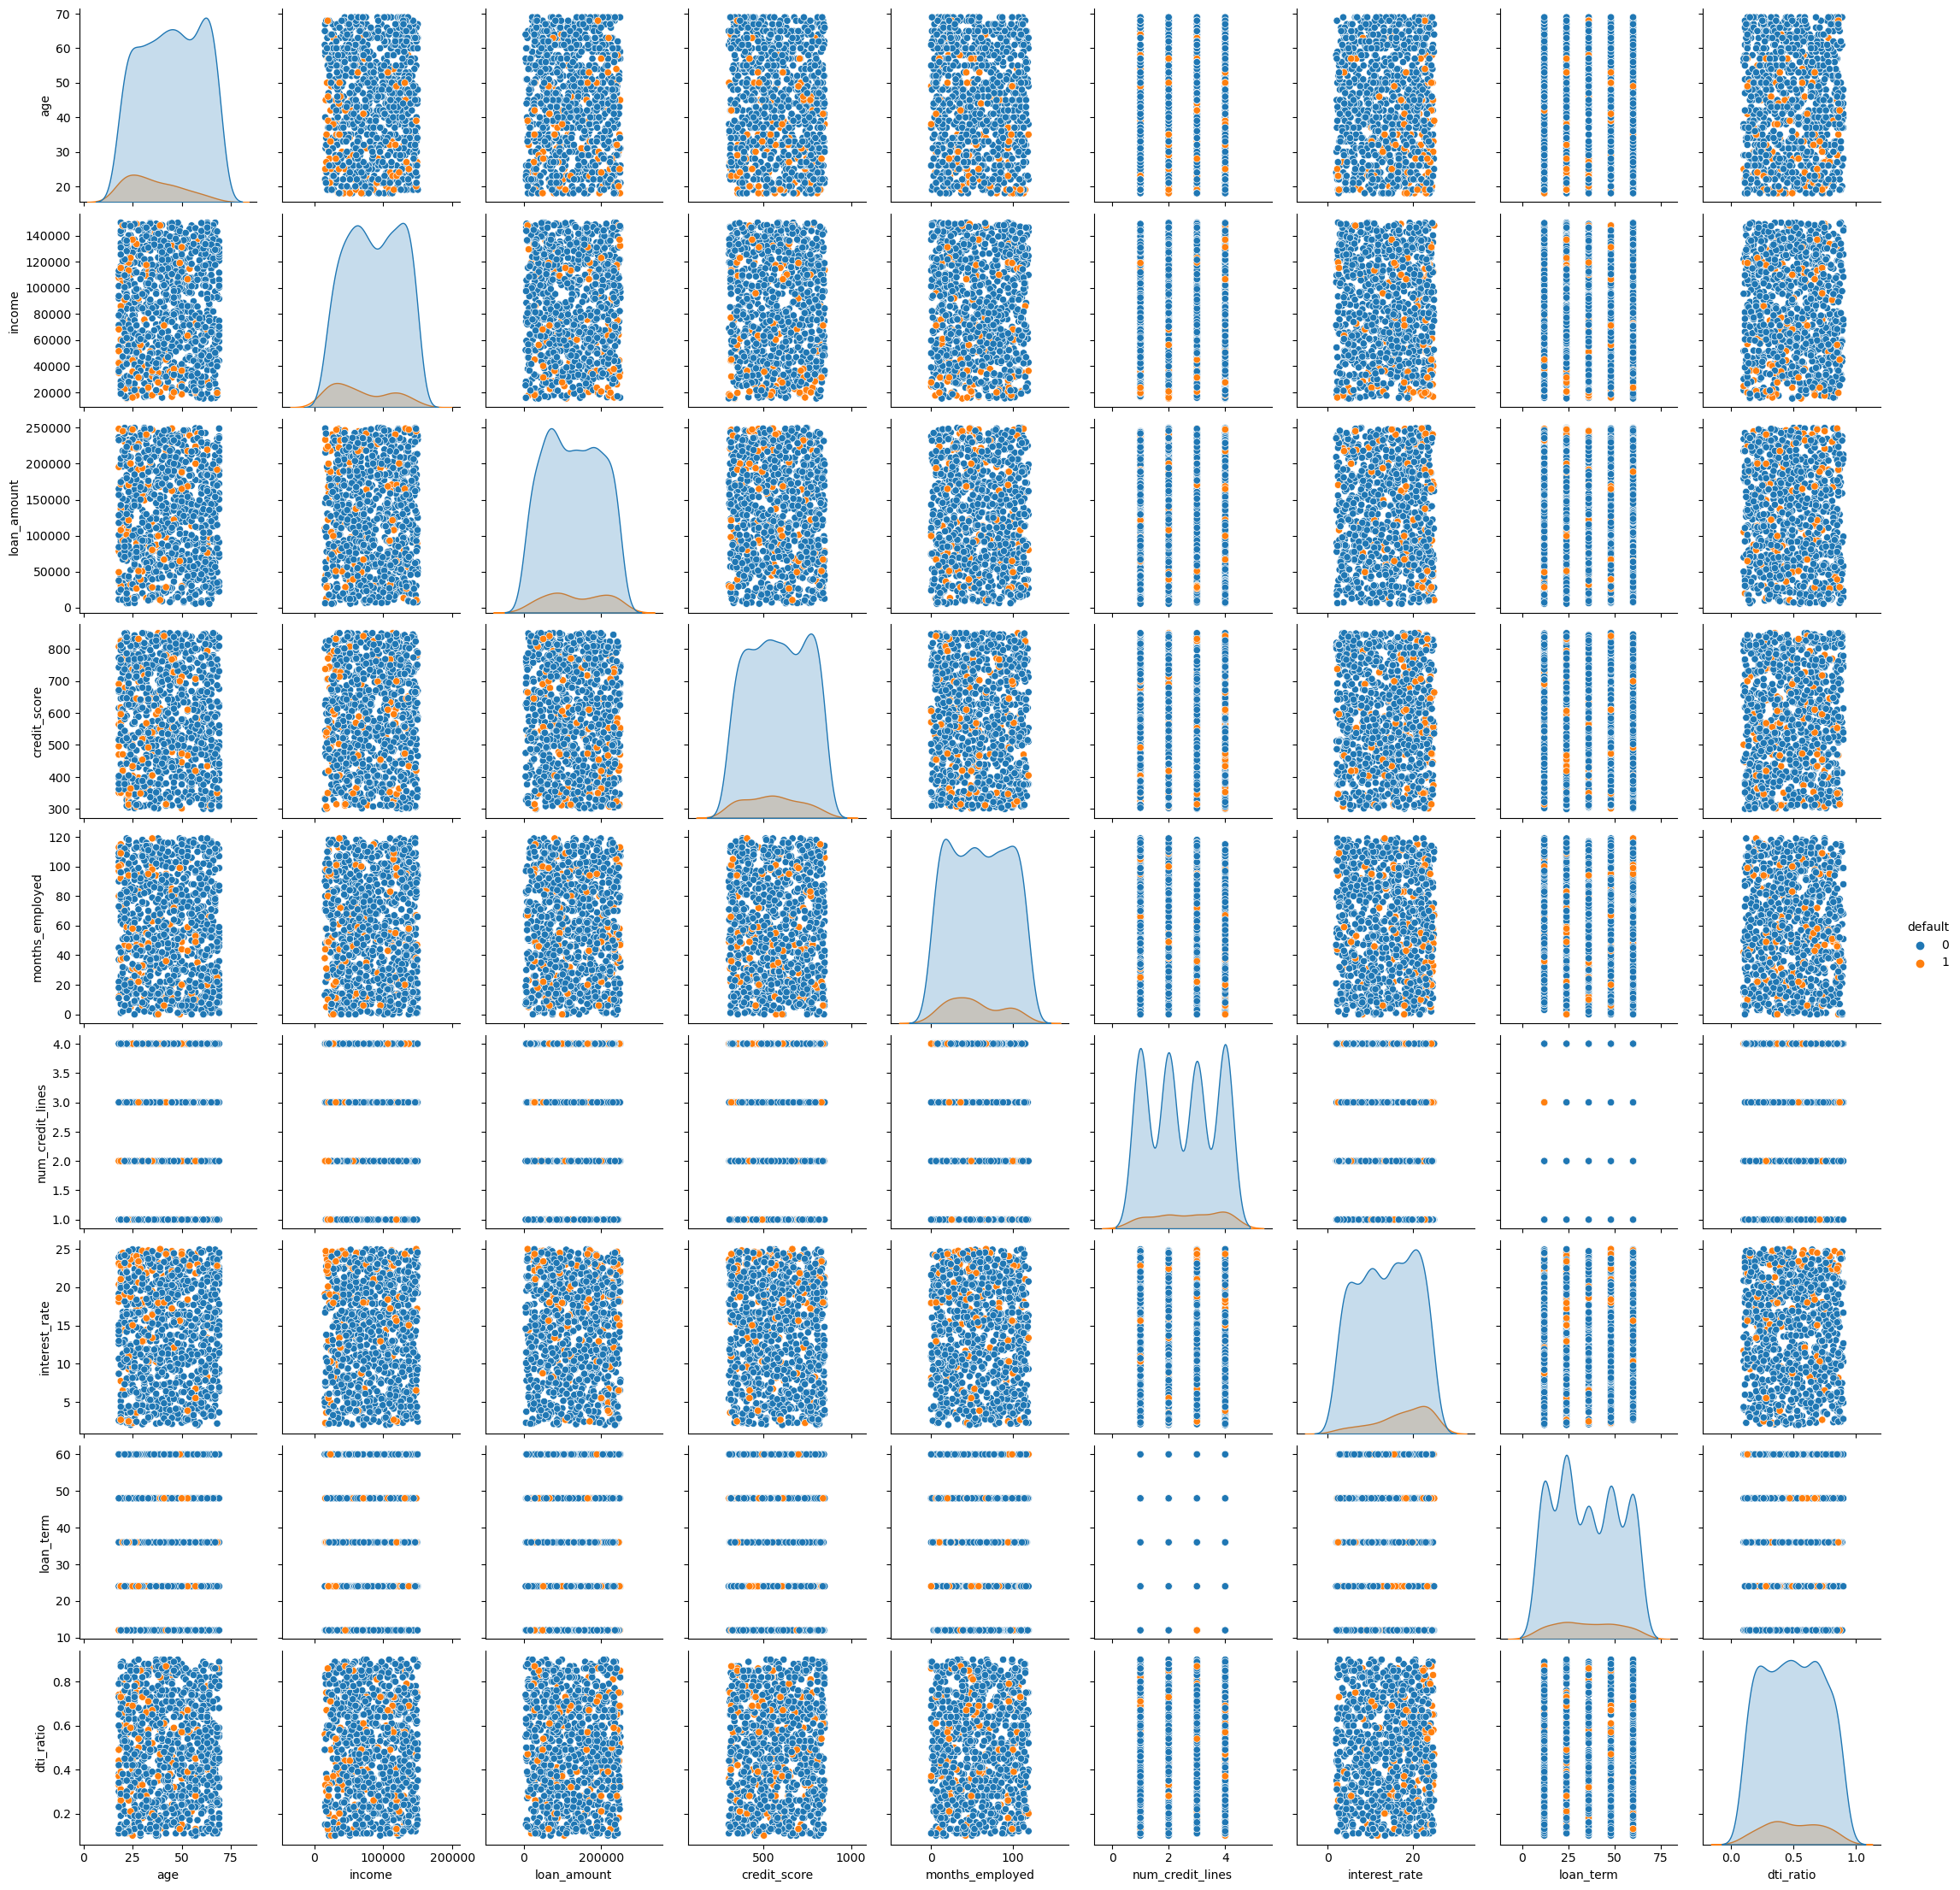

In [10]:
sns.pairplot(df.sample(1_000), hue = 'default')

In [15]:
summarize(df)

(255347, 17)

_________________________________________________



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               255347 non-null  int64  
 1   income            255347 non-null  int64  
 2   loan_amount       255347 non-null  int64  
 3   credit_score      255347 non-null  int64  
 4   months_employed   255347 non-null  int64  
 5   num_credit_lines  255347 non-null  int64  
 6   interest_rate     255347 non-null  float64
 7   loan_term         255347 non-null  int64  
 8   dti_ratio         255347 non-null  float64
 9   education         255347 non-null  object 
 10  employment_type   255347 non-null  object 
 11  marital_status    255347 non-null  object 
 12  mortgage          255347 non-null  object 
 13  dependents        255347 non-null  object 
 14  loan_purpose      255347 non-null  object 
 15  cosigned          255347 non-null  object 
 16  default           25


age                 0
income              0
loan_amount         0
credit_score        0
months_employed     0
num_credit_lines    0
interest_rate       0
loan_term           0
dti_ratio           0
education           0
employment_type     0
marital_status      0
mortgage            0
dependents          0
loan_purpose        0
cosigned            0
default             0
dtype: int64

_________________________________________________




55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
44    4906
36    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: age, dtype: int64

_________________________________________________




69492     10
117102    10
121985    10
85375      9
61315      9
          ..
98969      1
72350      1
126600     1
68356      1
124446     1
Name: income, Length: 114620, dtype: int64

_________________________________________________




133724    8
221949    8
95419     8
235258    7
108323    7
         ..
121259    1
147115    1
166792    1
39044     1
208294    1
Name: loan_amount, Length: 158729, dtype: int64

_________________________________________________




630    528
445    521
829    520
753    519
670    515
      ... 
629    408
706    406
536    406
720    402
724    392
Name: credit_score, Length: 550, dtype: int64

_________________________________________________




56     2227
26     2223
45     2220
107    2207
17     2198
       ... 
11     2043
39     2041
21     2014
99     2008
25     2004
Name: months_employed, Length: 120, dtype: int64

_________________________________________________




2    64130
3    63834
4    63829
1    63554
Name: num_credit_lines, dtype: int64

_________________________________________________




14.92    147
2.25     144
4.78     140
16.44    140
7.30     139
        ... 
15.50     83
4.58      82
14.34     81
25.00     53
2.00      44
Name: interest_rate, Length: 2301, dtype: int64

_________________________________________________




48    51166
60    51154
36    51061
24    51009
12    50957
Name: loan_term, dtype: int64

_________________________________________________




0.67    3385
0.64    3308
0.37    3288
0.13    3285
0.19    3285
        ... 
0.68    3078
0.35    3068
0.11    3051
0.10    1611
0.90    1605
Name: dti_ratio, Length: 81, dtype: int64

_________________________________________________




Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: education, dtype: int64

_________________________________________________




Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: employment_type, dtype: int64

_________________________________________________




Married     85302
Divorced    85033
Single      85012
Name: marital_status, dtype: int64

_________________________________________________




Yes    127677
No     127670
Name: mortgage, dtype: int64

_________________________________________________




Yes    127742
No     127605
Name: dependents, dtype: int64

_________________________________________________




Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: loan_purpose, dtype: int64

_________________________________________________




Yes    127701
No     127646
Name: cosigned, dtype: int64

_________________________________________________




0    225694
1     29653
Name: default, dtype: int64

_________________________________________________



In [16]:
credit_bins = [300, 400, 500, 600, 700, 800, 850]
credit_labels = ['300s', '400s', '500s', '600s', '700s', '800s']

# Create a new column 'credit_Bin' by assigning data points to bins
df['credit_bin'] = pd.cut(df['credit_score'], bins=credit_bins, labels = credit_labels, right= False)

In [17]:
df[(df.credit_bin == '800s')&(df.default == 0)].age.mean()

44.30484290101583

In [18]:
age_bins = [18, 26, 30, 36, 40, 46, 50, 56, 60, 66, 70]
age_labels = ['18-25', '26-29', '30-35', '36-39', '40-45', '46-49', '50-55', '56-59', '60-65', '66-69']

# Create a new column 'Age_Bin' by assigning data points to bins
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels = age_labels, right= False)

In [84]:
df[df.age == 69]

loan_id  age  income  loan_amount  credit_score  months_employed  \
1       HPSK72WA7R   69   50432       124440           458               15   
39      5FENBP2UV8   69   87295        16281           707               94   
160     AK528U4ZW4   69  126838       221077           818               35   
195     F74TVB524O   69   19459        29148           726               31   
215     NJEZ1ZGWB3   69   86549       135912           721              114   
...            ...  ...     ...          ...           ...              ...   
254981  CCW7P8AGV2   69   46444       125119           804               27   
255081  F3GSMAZVES   69  125748       208731           464               76   
255192  HSV4TBJNW0   69  102466       172764           562               11   
255312  1BYA5HN05I   69  109352       129234           767               56   
255334  Y5HYHQWBVP   69   34859       105905           715               25   

        num_credit_lines  interest_rate  loan_term  dti_ratio    education  \
1                      1           4.81         60       0.68     Master's   
39                     1          13.82         60       0.75   Bachelor's   
160                    2          23.15         36       0.37  High School   
195                    4           5.27         24       0.66  High School   
215                    3           2.77         36       0.52          PhD   
...                  ...            ...        ...        ...          ...   
254981                 1          12.50         36       0.59   Bachelor's   
255081                 1          13.05         48       0.71          PhD   
255192                 4          15.93         48       0.88          PhD   
255312                 4          11.76         36       0.39   Bachelor's   
255334                 2          20.28         48       0.35          PhD   

       employment_type marital_status mortgage dependents loan_purpose  \
1            Full-time        Married       No         No        Other   
39           Part-time         Single       No         No        Other   
160      Self-employed         Single      Yes        Yes     Business   
195         Unemployed        Married      Yes        Yes        Other   
215          Part-time       Divorced       No        Yes     Business   
...                ...            ...      ...        ...          ...   
254981   Self-employed         Single       No        Yes         Auto   
255081       Full-time        Married      Yes        Yes        Other   
255192       Part-time        Married      Yes         No     Business   
255312      Unemployed        Married      Yes        Yes         Home   
255334   Self-employed       Divorced       No        Yes     Business   

       cosigned  default age_bin credit_bin  
1           Yes        0   66-69       400s  
39           No        0   66-69       700s  
160          No        0   66-69       800s  
195          No        0   66-69       700s  
215          No        0   66-69       700s  
...         ...      ...     ...        ...  
254981      Yes        0   66-69       800s  
255081       No        0   66-69       400s  
255192      Yes        0   66-69       500s  
255312      Yes        0   66-69       700s  
255334       No        0   66-69       700s  

[4817 rows x 20 columns]

In [20]:
df.interest_rate.max()

25.0

In [21]:
interest_bins = [1, 7, 11, 16, 20, 26]
interest_labels = ['2-6', '7-10', '11-15', '16-19', '20-25']

# Create a new column 'Age_Bin' by assigning data points to bins
df['interest_bin'] = pd.cut(df['interest_rate'], bins = interest_bins, labels = interest_labels, right= False)

In [22]:
df[(df.interest_rate < 25.9)&(df.interest_rate > 20.9)]

age  income  loan_amount  credit_score  months_employed  \
2        46   84208       129188           451               26   
5        25   90298        90448           720               18   
8        36   42053        92357           827               83   
25       50   81649        78193           839              110   
26       29  114651       197648           343               58   
...     ...     ...          ...           ...              ...   
255280   59  145458       125077           351               55   
255293   59   62433       185124           343               26   
255317   46   49616        31272           372               31   
255322   58   57577        97535           579               17   
255333   22   45575        43355           545               99   

        num_credit_lines  interest_rate  loan_term  dti_ratio    education  \
2                      3          21.17         24       0.31     Master's   
5                      2          22.72         24       0.10  High School   
8                      1          23.94         48       0.20   Bachelor's   
25                     1          21.41         48       0.50     Master's   
26                     3          21.07         24       0.19   Bachelor's   
...                  ...            ...        ...        ...          ...   
255280                 3          23.37         48       0.87          PhD   
255293                 3          23.61         24       0.69   Bachelor's   
255317                 4          23.06         12       0.13     Master's   
255322                 4          24.01         36       0.78     Master's   
255333                 1          21.86         12       0.52          PhD   

       employment_type marital_status mortgage dependents loan_purpose  \
2           Unemployed       Divorced      Yes        Yes         Auto   
5           Unemployed         Single      Yes         No     Business   
8        Self-employed       Divorced      Yes         No    Education   
25           Part-time        Married      Yes         No     Business   
26           Part-time        Married      Yes         No         Home   
...                ...            ...      ...        ...          ...   
255280      Unemployed       Divorced       No        Yes     Business   
255293   Self-employed       Divorced      Yes        Yes    Education   
255317       Part-time       Divorced      Yes        Yes    Education   
255322       Part-time        Married       No        Yes         Auto   
255333      Unemployed        Married      Yes        Yes    Education   

       cosigned  default credit_bin age_bin interest_bin  
2            No        1       400s   46-49        20-25  
5           Yes        1       700s   18-25        20-25  
8            No        1       800s   36-39        20-25  
25          Yes        0       800s   50-55        20-25  
26          Yes        0       300s   26-29        20-25  
...         ...      ...        ...     ...          ...  
255280      Yes        0       300s   56-59        20-25  
255293       No        0       300s   56-59        20-25  
255317       No        0       300s   46-49        20-25  
255322       No        0       500s   56-59        20-25  
255333       No        1       500s   18-25        20-25  

[45369 rows x 20 columns]

In [23]:
df['years_employed'] = df.months_employed / 12
df.head()

age  income  loan_amount  credit_score  months_employed  num_credit_lines  \
0   56   85994        50587           520               80                 4   
1   69   50432       124440           458               15                 1   
2   46   84208       129188           451               26                 3   
3   32   31713        44799           743                0                 3   
4   60   20437         9139           633                8                 4   

   interest_rate  loan_term  dti_ratio    education  ... marital_status  \
0          15.23         36       0.44   Bachelor's  ...       Divorced   
1           4.81         60       0.68     Master's  ...        Married   
2          21.17         24       0.31     Master's  ...       Divorced   
3           7.07         24       0.23  High School  ...        Married   
4           6.51         48       0.73   Bachelor's  ...       Divorced   

  mortgage dependents loan_purpose cosigned default  credit_bin age_bin  \
0      Yes        Yes        Other      Yes       0        500s   56-59   
1       No         No        Other      Yes       0        400s   66-69   
2      Yes        Yes         Auto       No       1        400s   46-49   
3       No         No     Business       No       0        700s   30-35   
4       No        Yes         Auto       No       0        600s   60-65   

  interest_bin years_employed  
0        11-15       6.666667  
1          2-6       1.250000  
2        20-25       2.166667  
3         7-10       0.000000  
4          2-6       0.666667  

[5 rows x 21 columns]

In [24]:
year_emp_bins = [0, 3, 5, 7, 9, 10]
year_emp_labels = ['0-2', '3-4', '5-6', '7-8', '9-10']

# Create a new column 'Age_Bin' by assigning data points to bins
df['years_employed_bin'] = pd.cut(df['years_employed'], bins = year_emp_bins, labels = year_emp_labels, right= False)

In [25]:
df[(df.years_employed < 4)&(df.years_employed > 3)]

age  income  loan_amount  credit_score  months_employed  \
30       66   39568        58945           604               37   
34       33   92448        66282           607               39   
38       61   26470        19818           695               47   
59       61   49113       222046           771               47   
79       53   49335       187180           750               39   
...     ...     ...          ...           ...              ...   
255314   67   17781        79657           757               42   
255315   56   65095       196673           701               40   
255316   64   91861       208088           303               38   
255341   40  129890       116119           701               38   
255345   42   85109        60575           809               40   

        num_credit_lines  interest_rate  loan_term  dti_ratio    education  \
30                     4           6.67         12       0.10  High School   
34                     1          11.31         12       0.43   Bachelor's   
38                     2          20.00         36       0.69          PhD   
59                     3          22.80         12       0.24  High School   
79                     3          18.31         60       0.58          PhD   
...                  ...            ...        ...        ...          ...   
255314                 1          20.49         12       0.34          PhD   
255315                 3           4.58         48       0.45  High School   
255316                 2           8.29         12       0.11     Master's   
255341                 3           9.91         24       0.23  High School   
255345                 1          20.90         48       0.44  High School   

        ... mortgage dependents loan_purpose cosigned default credit_bin  \
30      ...      Yes        Yes         Auto      Yes       0       600s   
34      ...      Yes         No         Home      Yes       0       600s   
38      ...      Yes        Yes         Auto      Yes       0       600s   
59      ...       No        Yes        Other       No       0       700s   
79      ...      Yes         No         Home      Yes       0       700s   
...     ...      ...        ...          ...      ...     ...        ...   
255314  ...      Yes        Yes         Auto      Yes       0       700s   
255315  ...       No        Yes    Education       No       0       700s   
255316  ...      Yes        Yes         Auto      Yes       0       300s   
255341  ...      Yes         No         Home      Yes       1       700s   
255345  ...      Yes        Yes        Other       No       0       800s   

        age_bin interest_bin years_employed years_employed_bin  
30        66-69          2-6       3.083333                3-4  
34        30-35        11-15       3.250000                3-4  
38        60-65        20-25       3.916667                3-4  
59        60-65        20-25       3.916667                3-4  
79        50-55        16-19       3.250000                3-4  
...         ...          ...            ...                ...  
255314    66-69        20-25       3.500000                3-4  
255315    56-59          2-6       3.333333                3-4  
255316    60-65         7-10       3.166667                3-4  
255341    40-45         7-10       3.166667                3-4  
255345    40-45        20-25       3.333333                3-4  

[23458 rows x 22 columns]

In [26]:
loan_amount_bins = [5000, 50_000, 100_000, 150_000, 200_000, 250_000]
loan_amount_labels = ['5k-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k']

# Create a new column 'Age_Bin' by assigning data points to bins
df['loan_amount_bin'] = pd.cut(df['loan_amount'], bins = loan_amount_bins, labels = loan_amount_labels, right= True)

In [27]:
df[(df.loan_amount < 250_000)&(df.loan_amount > 200_000)]

age  income  loan_amount  credit_score  months_employed  \
9        40  132784       228510           480              114   
15       41   74064       230883           432               31   
31       44  100284       225403           551               31   
36       64  102463       218433           506               24   
42       68  111716       215851           747               99   
...     ...     ...          ...           ...              ...   
255326   48   44894       202276           473               10   
255328   50   21890       226684           839               62   
255335   41  124446       249800           650               60   
255342   19   37979       210682           541              109   
255344   56   84820       208294           597               70   

        num_credit_lines  interest_rate  loan_term  dti_ratio    education  \
9                      4           9.09         48       0.33  High School   
15                     2           5.00         60       0.89     Master's   
31                     1          18.77         36       0.17     Master's   
36                     2           9.23         60       0.86     Master's   
42                     3          18.84         60       0.40  High School   
...                  ...            ...        ...        ...          ...   
255326                 3           7.32         48       0.26  High School   
255328                 1           5.80         48       0.65  High School   
255335                 4           3.32         24       0.21  High School   
255342                 4          14.11         12       0.85   Bachelor's   
255344                 3           5.29         60       0.50  High School   

        ... dependents loan_purpose cosigned default credit_bin age_bin  \
9       ...         No        Other      Yes       0       400s   40-45   
15      ...         No         Auto       No       0       400s   40-45   
31      ...        Yes     Business      Yes       1       500s   40-45   
36      ...         No         Auto      Yes       0       500s   60-65   
42      ...        Yes         Home       No       0       700s   66-69   
...     ...        ...          ...      ...     ...        ...     ...   
255326  ...        Yes         Auto       No       0       400s   46-49   
255328  ...         No         Home       No       0       800s   50-55   
255335  ...         No        Other       No       0       600s   40-45   
255342  ...         No        Other       No       0       500s   18-25   
255344  ...        Yes         Auto      Yes       0       500s   56-59   

        interest_bin years_employed years_employed_bin loan_amount_bin  
9               7-10       9.500000               9-10       200k-250k  
15               2-6       2.583333                0-2       200k-250k  
31             16-19       2.583333                0-2       200k-250k  
36              7-10       2.000000                0-2       200k-250k  
42             16-19       8.250000                7-8       200k-250k  
...              ...            ...                ...             ...  
255326          7-10       0.833333                0-2       200k-250k  
255328           2-6       5.166667                5-6       200k-250k  
255335           2-6       5.000000                5-6       200k-250k  
255342         11-15       9.083333               9-10       200k-250k  
255344           2-6       5.833333                5-6       200k-250k  

[52419 rows x 23 columns]

In [49]:
df.dti_ratio.max()

0.9

In [50]:
dti_bins = [0, .3, .6, .99]
dti_labels = ['0-.3', '.3-.6', '.6-.9']

# Create a new column 'Age_Bin' by assigning data points to bins
df['dti_bin'] = pd.cut(df['dti_ratio'], bins = dti_bins, labels = dti_labels, right= True)

In [28]:
income_bins = [1500, 30_000, 60_000, 90_000, 120_000, 150_000]
income_labels = ['15k-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k']

# Create a new column 'Age_Bin' by assigning data points to bins
df['income_bin'] = pd.cut(df['income'], bins = income_bins, labels = income_labels, right= True)

In [29]:
df[(df.income < 90_000)&(df.income > 60_000)]

age  income  loan_amount  credit_score  months_employed  \
0        56   85994        50587           520               80   
2        46   84208       129188           451               26   
15       41   74064       230883           432               31   
25       50   81649        78193           839              110   
28       61   62519        29676           462               16   
...     ...     ...          ...           ...              ...   
255337   64   73743       140354           300                0   
255339   51   69492       122962           348               66   
255340   41   61809       119238           444               34   
255344   56   84820       208294           597               70   
255345   42   85109        60575           809               40   

        num_credit_lines  interest_rate  loan_term  dti_ratio    education  \
0                      4          15.23         36       0.44   Bachelor's   
2                      3          21.17         24       0.31     Master's   
15                     2           5.00         60       0.89     Master's   
25                     1          21.41         48       0.50     Master's   
28                     1          23.91         48       0.12   Bachelor's   
...                  ...            ...        ...        ...          ...   
255337                 2           4.12         12       0.24          PhD   
255339                 2          10.83         48       0.27  High School   
255340                 2          19.99         36       0.31     Master's   
255344                 3           5.29         60       0.50  High School   
255345                 1          20.90         48       0.44  High School   

        ... loan_purpose cosigned default credit_bin age_bin interest_bin  \
0       ...        Other      Yes       0       500s   56-59        11-15   
2       ...         Auto       No       1       400s   46-49        20-25   
15      ...         Auto       No       0       400s   40-45          2-6   
25      ...     Business      Yes       0       800s   50-55        20-25   
28      ...         Home      Yes       0       400s   60-65        20-25   
...     ...          ...      ...     ...        ...     ...          ...   
255337  ...    Education      Yes       0       300s   60-65          2-6   
255339  ...         Home       No       0       300s   50-55         7-10   
255340  ...         Auto      Yes       0       400s   40-45        16-19   
255344  ...         Auto      Yes       0       500s   56-59          2-6   
255345  ...        Other       No       0       800s   40-45        20-25   

        years_employed years_employed_bin loan_amount_bin income_bin  
0             6.666667                5-6        50k-100k    60k-90k  
2             2.166667                0-2       100k-150k    60k-90k  
15            2.583333                0-2       200k-250k    60k-90k  
25            9.166667               9-10        50k-100k    60k-90k  
28            1.333333                0-2          5k-50k    60k-90k  
...                ...                ...             ...        ...  
255337        0.000000                0-2       100k-150k    60k-90k  
255339        5.500000                5-6       100k-150k    60k-90k  
255340        2.833333                0-2       100k-150k    60k-90k  
255344        5.833333                5-6       200k-250k    60k-90k  
255345        3.333333                3-4        50k-100k    60k-90k  

[56872 rows x 24 columns]

<Axes: xlabel='age_bin', ylabel='default'>

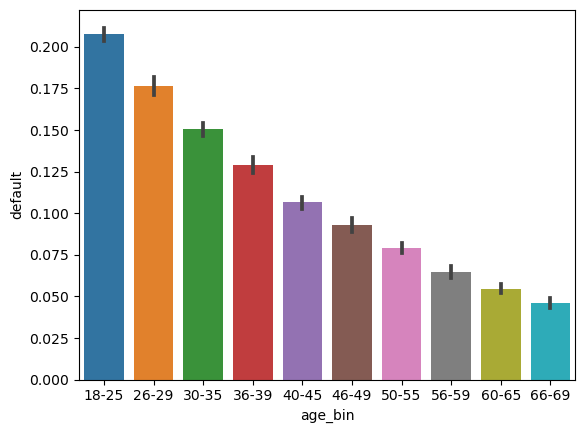

In [30]:

sns.barplot(data = df, x = 'age_bin', y = 'default')


<Axes: xlabel='credit_bin', ylabel='default'>

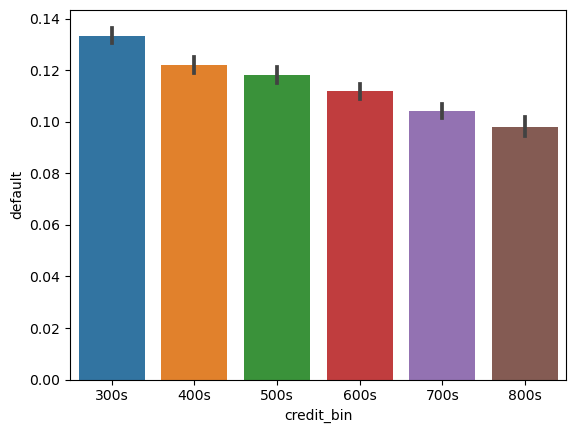

In [31]:
sns.barplot(data = df, x = 'credit_bin', y = 'default')

<Axes: xlabel='income_bin', ylabel='default'>

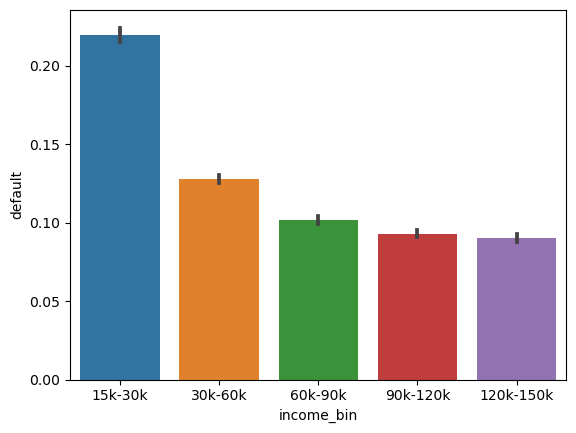

In [32]:
sns.barplot(data = df, x = 'income_bin', y = 'default')

<Axes: xlabel='interest_bin', ylabel='default'>

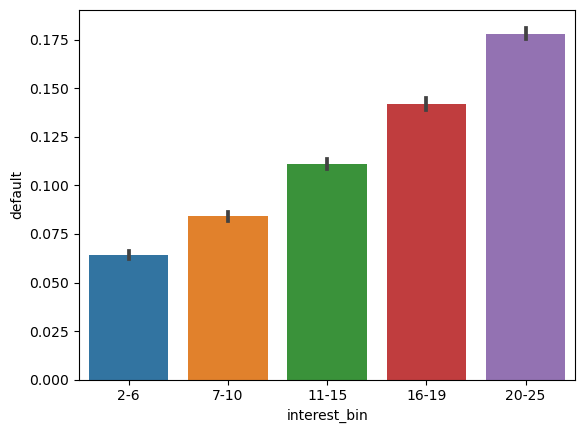

In [33]:
sns.barplot(data = df, x = 'interest_bin', y = 'default')

<Axes: xlabel='loan_amount_bin', ylabel='default'>

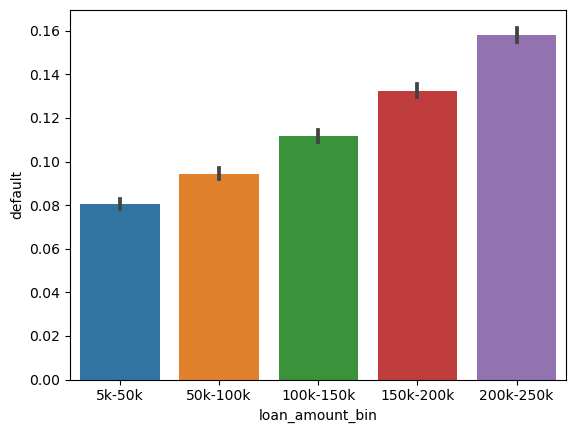

In [34]:
sns.barplot(data = df, x = 'loan_amount_bin', y = 'default')

<Axes: xlabel='marital_status', ylabel='default'>

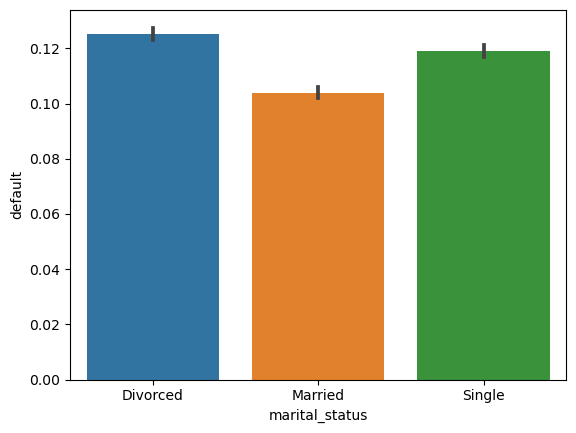

In [35]:
sns.barplot(data = df, x = 'marital_status', y = 'default')

<Axes: xlabel='education', ylabel='default'>

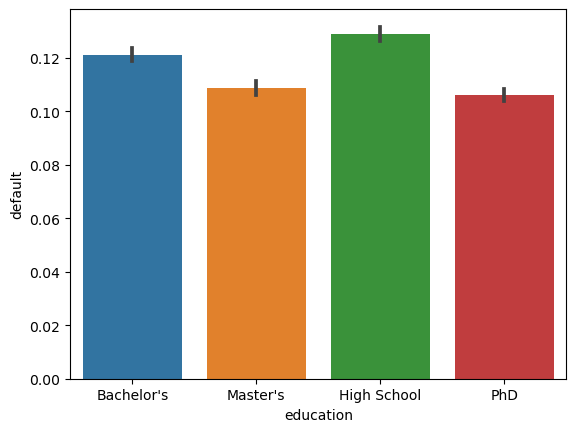

In [36]:
sns.barplot(data = df, x = 'education', y = 'default')

<Axes: xlabel='mortgage', ylabel='default'>

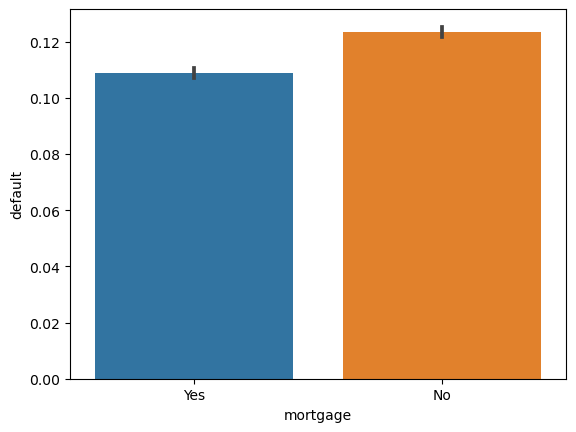

In [37]:
sns.barplot(data = df, x = 'mortgage', y = 'default')

<Axes: xlabel='num_credit_lines', ylabel='default'>

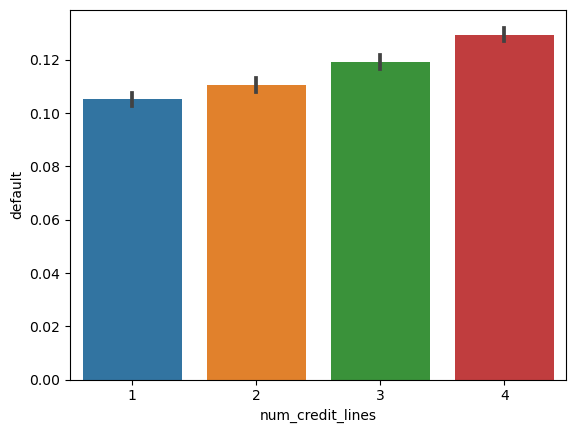

In [38]:
sns.barplot(data = df, x = 'num_credit_lines', y = 'default')

<Axes: xlabel='years_employed_bin', ylabel='default'>

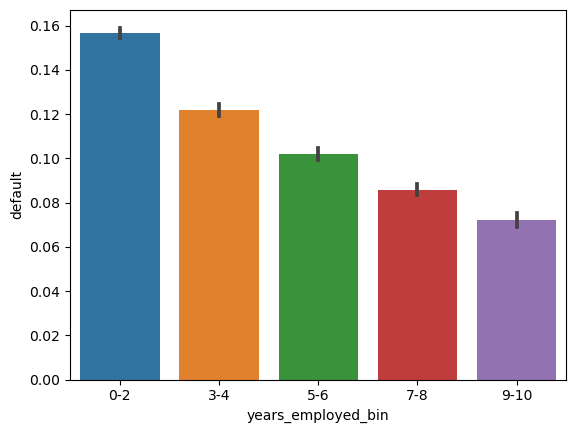

In [39]:
sns.barplot(data = df, x = 'years_employed_bin', y = 'default')

<Axes: xlabel='cosigned', ylabel='default'>

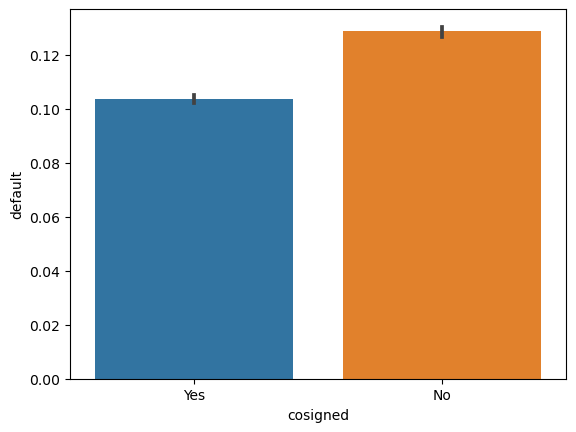

In [40]:
sns.barplot(data = df, x = 'cosigned', y = 'default')

<Axes: xlabel='employment_type', ylabel='default'>

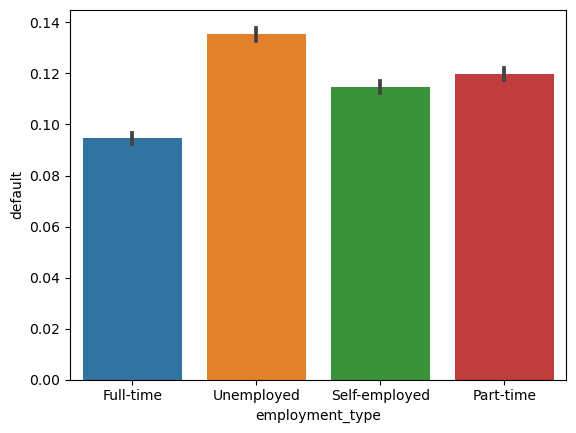

In [41]:
sns.barplot(data = df, x = 'employment_type', y = 'default')

<Axes: xlabel='dti_bin', ylabel='default'>

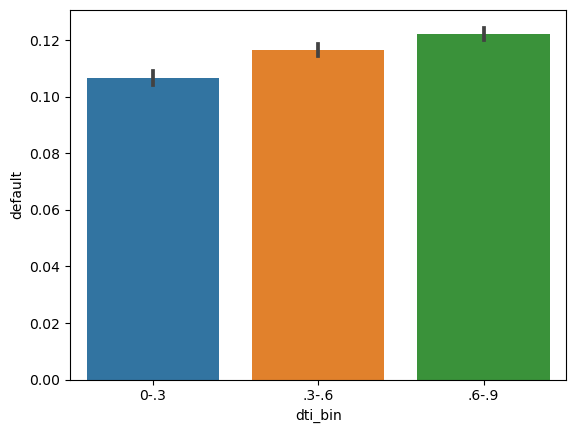

In [52]:
sns.barplot(data = df, x = 'dti_bin', y = 'default')

<Axes: xlabel='loan_purpose', ylabel='default'>

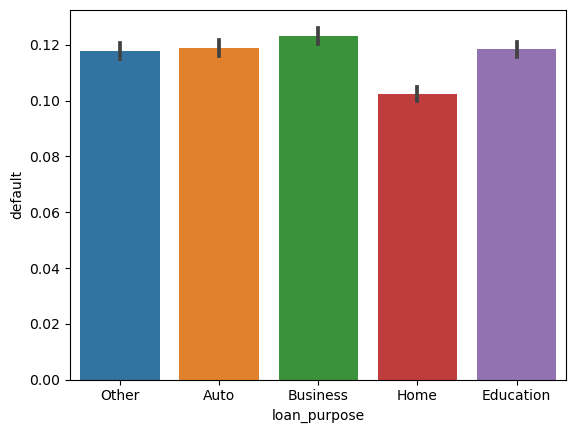

In [42]:
sns.barplot(data = df, x = 'loan_purpose', y = 'default')

<Axes: xlabel='loan_term', ylabel='default'>

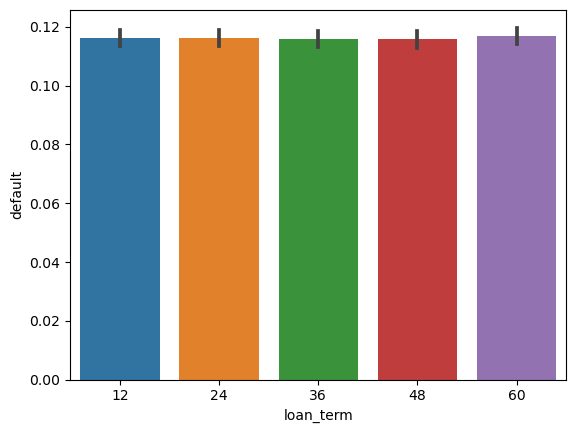

In [53]:
sns.barplot(data = df, x = 'loan_term', y = 'default')

<Axes: xlabel='interest_bin', ylabel='count'>

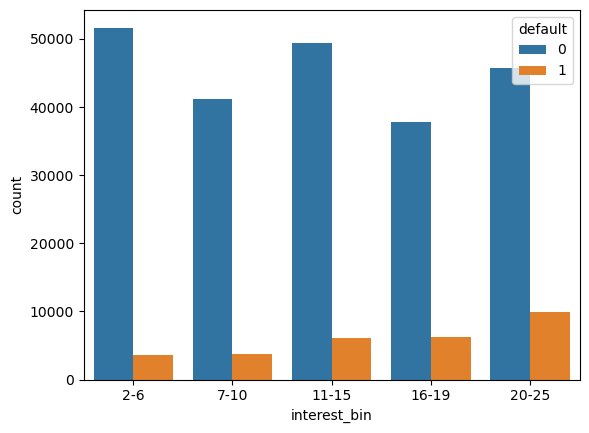

In [45]:
sns.countplot(data=df, x='interest_bin', hue='default')

In [43]:
df.columns

Index(['age', 'income', 'loan_amount', 'credit_score', 'months_employed',
       'num_credit_lines', 'interest_rate', 'loan_term', 'dti_ratio',
       'education', 'employment_type', 'marital_status', 'mortgage',
       'dependents', 'loan_purpose', 'cosigned', 'default', 'credit_bin',
       'age_bin', 'interest_bin', 'years_employed', 'years_employed_bin',
       'loan_amount_bin', 'income_bin'],
      dtype='object')

In [44]:
corr = df.corrwith(df['default'])
print(corr.sort_values(ascending=False))

default             1.000000
interest_rate       0.131273
loan_amount         0.086659
num_credit_lines    0.028330
dti_ratio           0.019236
loan_term           0.000545
credit_score       -0.034166
months_employed    -0.097374
years_employed     -0.097374
income             -0.099119
age                -0.167783
dtype: float64


/var/folders/xv/ltdj6hd169j2bd0gclmjj3th0000gn/T/ipykernel_4932/821505215.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['default'])


## age has no relationship with any feature and only the target variable

## continue exploring on other features 

In [215]:
df = pd.get_dummies(df)
df.head()

age    income  loan_amount  credit_score  months_employed  \
0  0.745098  0.525885     0.186070      0.400729         0.672269   
1  1.000000  0.262461     0.487512      0.287796         0.126050   
2  0.549020  0.512656     0.506892      0.275046         0.218487   
3  0.274510  0.123801     0.162446      0.806922         0.000000   
4  0.823529  0.040274     0.016894      0.606557         0.067227   

   num_credit_lines  interest_rate  loan_term  dti_ratio  default  ...  \
0                 4       0.575217         36     0.4250        0  ...   
1                 1       0.122174         60     0.7250        0  ...   
2                 3       0.833478         24     0.2625        1  ...   
3                 3       0.220435         24     0.1625        0  ...   
4                 4       0.196087         48     0.7875        0  ...   

   mortgage_Yes  dependents_No  dependents_Yes  loan_purpose_Auto  \
0             1              0               1                  0   
1             0              1               0                  0   
2             1              0               1                  1   
3             0              1               0                  0   
4             0              0               1                  1   

   loan_purpose_Business  loan_purpose_Education  loan_purpose_Home  \
0                      0                       0                  0   
1                      0                       0                  0   
2                      0                       0                  0   
3                      1                       0                  0   
4                      0                       0                  0   

   loan_purpose_Other  cosigned_No  cosigned_Yes  
0                   1            0             1  
1                   1            0             1  
2                   0            1             0  
3                   0            1             0  
4                   0            1             0  

[5 rows x 32 columns]

In [206]:
def get_continuous_feats(df) -> list:
    '''
    find all continuous numerical features
    
    return: list of column names (strings)
    '''
    num_cols = []
    num_df = df.select_dtypes('number')
    for col in num_df:
        if num_df[col].nunique() > 20:
            num_cols.append(col)
    return num_cols

In [212]:
num_cols = get_continuous_feats(df)
df[num_cols]

age  income  loan_amount  credit_score  months_employed  \
0        56   85994        50587           520               80   
1        69   50432       124440           458               15   
2        46   84208       129188           451               26   
3        32   31713        44799           743                0   
4        60   20437         9139           633                8   
...     ...     ...          ...           ...              ...   
255342   19   37979       210682           541              109   
255343   32   51953       189899           511               14   
255344   56   84820       208294           597               70   
255345   42   85109        60575           809               40   
255346   62   22418        18481           636              113   

        interest_rate  dti_ratio  
0               15.23       0.44  
1                4.81       0.68  
2               21.17       0.31  
3                7.07       0.23  
4                6.51       0.73  
...               ...        ...  
255342          14.11       0.85  
255343          11.55       0.21  
255344           5.29       0.50  
255345          20.90       0.44  
255346           6.73       0.48  

[255347 rows x 7 columns]

In [213]:
scaler = MinMaxScaler()

#fit the thing
scaler.fit(df[num_cols])

#use the thing
df[num_cols] = scaler.transform(df[num_cols])

df.head()

loan_id       age    income  loan_amount  credit_score  months_employed  \
0  I38PQUQS96  0.745098  0.525885     0.186070      0.400729         0.672269   
1  HPSK72WA7R  1.000000  0.262461     0.487512      0.287796         0.126050   
2  C1OZ6DPJ8Y  0.549020  0.512656     0.506892      0.275046         0.218487   
3  V2KKSFM3UN  0.274510  0.123801     0.162446      0.806922         0.000000   
4  EY08JDHTZP  0.823529  0.040274     0.016894      0.606557         0.067227   

   num_credit_lines  interest_rate  loan_term  dti_ratio    education  \
0                 4       0.575217         36     0.4250   Bachelor's   
1                 1       0.122174         60     0.7250     Master's   
2                 3       0.833478         24     0.2625     Master's   
3                 3       0.220435         24     0.1625  High School   
4                 4       0.196087         48     0.7875   Bachelor's   

  employment_type marital_status mortgage dependents loan_purpose cosigned  \
0       Full-time       Divorced      Yes        Yes        Other      Yes   
1       Full-time        Married       No         No        Other      Yes   
2      Unemployed       Divorced      Yes        Yes         Auto       No   
3       Full-time        Married       No         No     Business       No   
4      Unemployed       Divorced       No        Yes         Auto       No   

   default  
0        0  
1        0  
2        1  
3        0  
4        0

In [227]:
X_train = df.drop(columns=['default'])
y_train = df.default

In [228]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=20)


In [229]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=20)

In [230]:
print(rf.feature_importances_)


[3.66336539e-01 2.07946093e-01 8.40353771e-02 6.31299023e-03
 1.03301284e-01 3.18410471e-03 1.60992736e-01 0.00000000e+00
 4.99245796e-04 2.98220287e-05 1.19666573e-03 2.27197107e-05
 5.33115942e-04 1.38275412e-02 0.00000000e+00 0.00000000e+00
 6.02688670e-03 9.56432429e-04 2.76380801e-03 0.00000000e+00
 3.88109570e-04 1.16453847e-03 8.29967054e-03 1.05199363e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.14998725e-04
 0.00000000e+00 1.14958344e-02 1.00515503e-02]


In [231]:
y_pred = rf.predict(X_train)


In [232]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.88


In [233]:
print(classification_report(y_train, y_pred))


/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    225694
           1       0.00      0.00      0.00     29653

    accuracy                           0.88    255347
   macro avg       0.44      0.50      0.47    255347
weighted avg       0.78      0.88      0.83    255347



/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


models = [
    XGBClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()
    
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    score = accuracy_score(y_pred, y_train)
    model_name = model.__class__.__name__
    print(f'{model_name} - Precision: {score:.2f}')

XGBClassifier - Precisión: 0.89
RandomForestClassifier - Precisión: 1.00
LogisticRegression - Precisión: 0.89
KNeighborsClassifier - Precisión: 0.89
GaussianNB - Precisión: 0.88


## I need to figure out how to get correct results for my models.

In [ ]:
bv